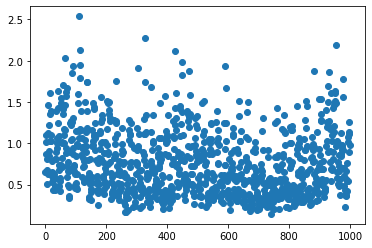

In [2]:
from model import *
import matplotlib.pyplot as plt
import pandas as pd

model = FXModel(5, 50)
for i in range(1000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
plt.scatter(data.index.tolist(), data['Spread'].tolist())

In [4]:
from mesa.batchrunner import batch_run
from model import FXModel
import pandas as pd

batch_run = batch_run(FXModel,
                        {"NumBanks": 5, "NumTraders": 50},
                        iterations=5,
                        max_steps=2000)


pd.DataFrame(batch_run)

5it [01:02, 12.49s/it]


,RunId,iteration,Step,NumBanks,NumTraders,Bid,Offer,Spread,Trades
0,0,0,2000,5,50,1.212571,1.212652,0.811667,131
1,1,1,2000,5,50,1.212571,1.212652,0.811667,237
2,2,2,2000,5,50,1.212571,1.212652,0.811667,212
3,3,3,2000,5,50,1.212571,1.212652,0.811667,203
4,4,4,2000,5,50,1.212571,1.212652,0.811667,229


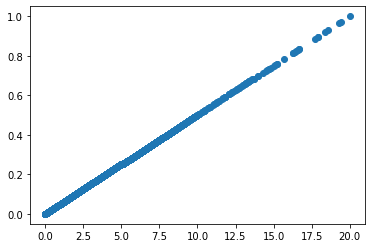

In [5]:
data = pd.read_csv("./data/probabilities.csv", dtype=(float, float))
X, y = [], []
for row in data.itertuples(index=False):
    X.append(row[0])
    y.append(row[1])
plt.scatter(X, y)